### Convolutional Auto-encoding

In [1]:
import tensorflow  as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
import matplotlib.pyplot as plt

### Preprocessing

In [6]:
(x_train,_), (x_test,_)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [7]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

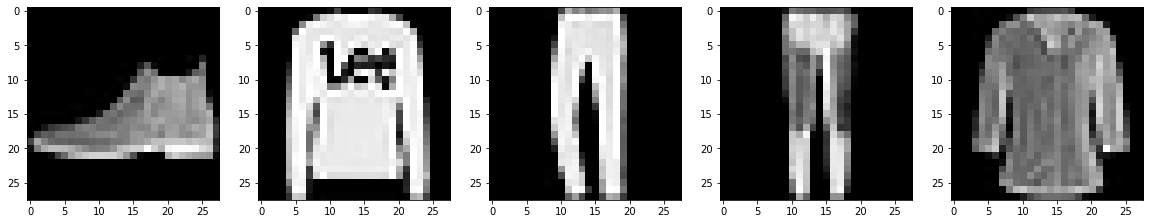

In [10]:
count=5
plt.figure(figsize=(20,10))

for i in range(count):
    ax = plt.subplot(2, count, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    
plt.show()
    

In [32]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [35]:
x_train.shape

(60000, 28, 28, 1)

### Normal Convolutional Auto Encoder

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input

In [36]:
input_l=Input(shape=(28,28,1))

encoding_1=Conv2D(32, (3,3), activation='relu',padding='same')(input_l)
maxp_1=MaxPooling2D((2,2), padding='same')(encoding_1)

encoding_2=Conv2D(16, (3,3), activation='relu',padding='same')(maxp_1)
maxp_2=MaxPooling2D((2,2), padding='same')(encoding_2)

encoding_3=Conv2D(8, (3,3), activation='relu',padding='same')(maxp_2)

bottleneck=MaxPooling2D((2,2), padding='same')(encoding_3)

decoding_1=Conv2D(8, (3,3), activation='relu', padding='same')(bottleneck)
Up_1=UpSampling2D((2,2))(decoding_1)


decoding_2=Conv2D(16, (3,3), activation='relu', padding='same')(Up_1)
Up_2=UpSampling2D((2,2))(decoding_2)

decoding_3=Conv2D(32, (3,3), activation='relu')(Up_2)
Up_3=UpSampling2D((2,2))(decoding_3)

output_l= Conv2D(1,(3,3),activation='sigmoid',padding='same')(Up_3)

autoencoder=Model(inputs=[input_l],outputs=[output_l])

In [37]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0   

In [38]:
from tensorflow.keras.utils import plot_model

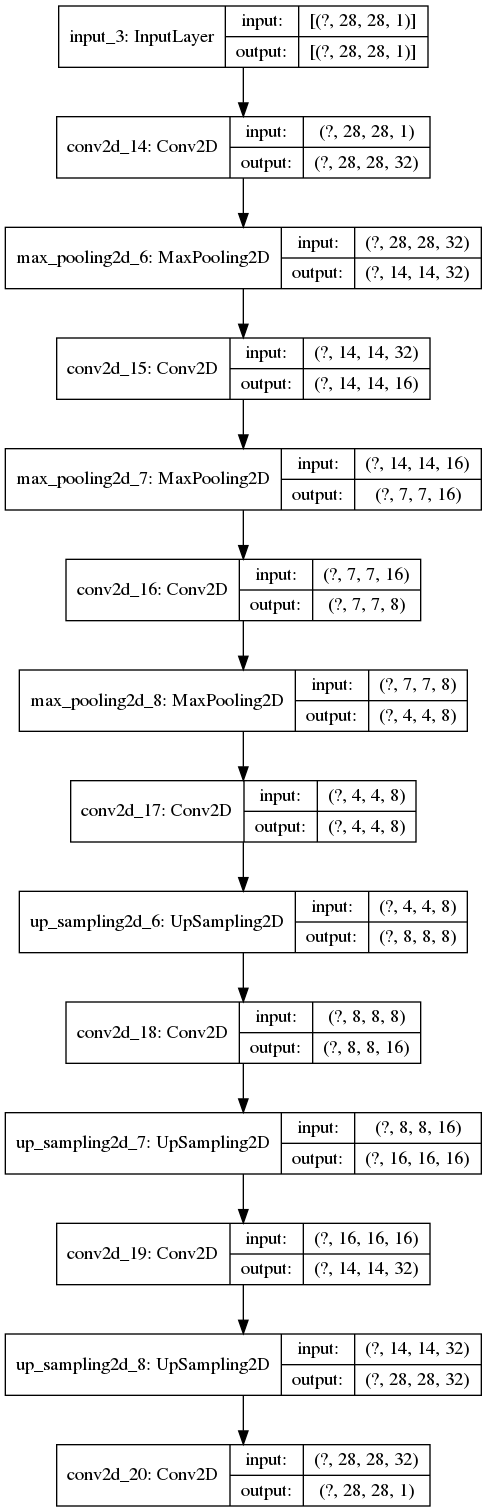

In [39]:
plot_model(autoencoder, to_file='model_plot_autoencoder_Conv.png', show_shapes=True, show_layer_names=True)

In [40]:
encoder=Model(inputs=[input_l],outputs=[bottleneck])

In [41]:
encoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0   

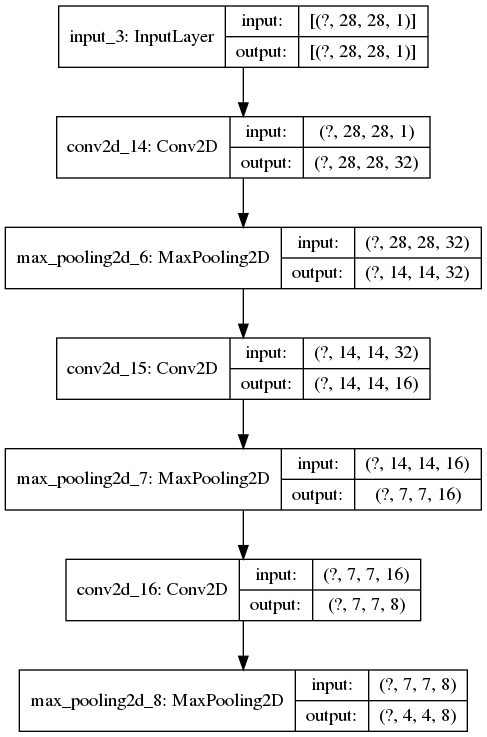

In [42]:
plot_model(encoder, to_file='model_plot_encoder_Conv.png', show_shapes=True, show_layer_names=True)

In [43]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [46]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.2966 - val_loss: 0.2956
Epoch 2/20
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.2913 - val_loss: 0.2915
Epoch 3/20
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2882 - val_loss: 0.2889
Epoch 4/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2862 - val_loss: 0.2872
Epoch 5/20
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2846 - val_loss: 0.2858
Epoch 6/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2834 - val_loss: 0.2847
Epoch 7/20
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2824 - val_loss: 0.2838
Epoch 8/20
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2815 - val_loss: 0.2830
Epoch 9/20
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.2807 - val_

In [47]:
decoded_images=autoencoder.predict(x_test)

In [48]:
encodings=encoder.predict(x_test)

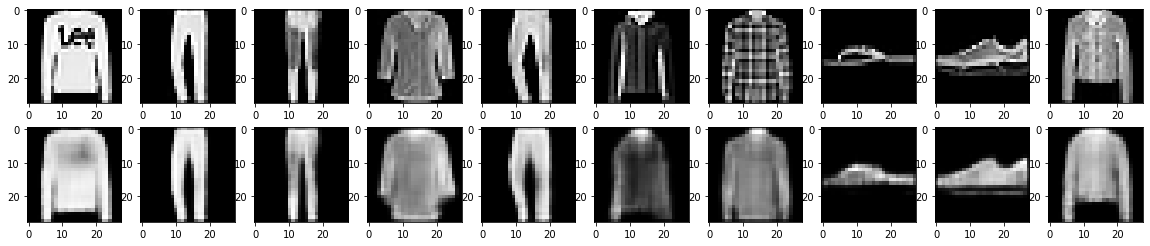

In [50]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    

    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
plt.show()

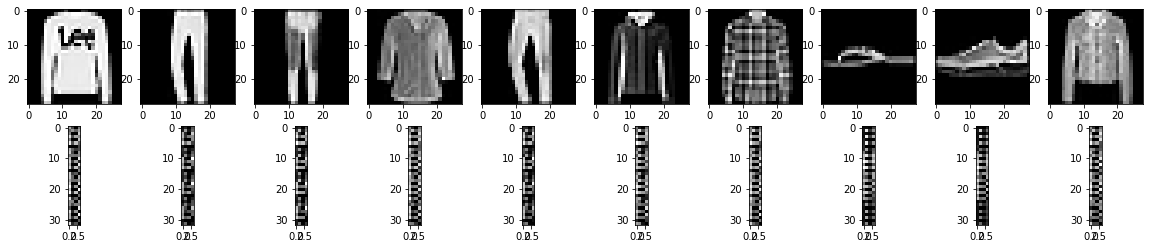

In [52]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    

    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(2, n, i + n)
    plt.imshow(encodings[i].reshape(32, 4))
    plt.gray()
plt.show()